# Jyotiprakash Jena
## Prediction using Supervised ML

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("data imported succesfully")
data.head()

data imported succesfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


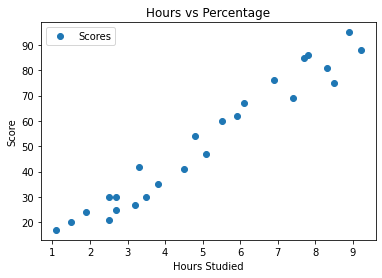

In [12]:
# plotting the distrubution of scores
data.plot(x="Hours", y="Scores", style = 'o')
plt.title("Hours vs Percentage")
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

##### Dividing the data into depenedent and independent values

In [64]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

The next step is to split the data into training set and test set

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

## Training the algorithm

In [66]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
print("Training complete")

Training complete


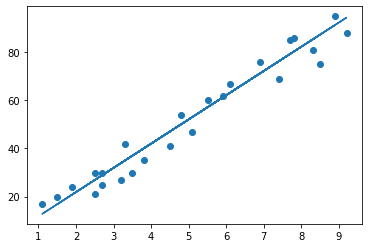

In [74]:
# Plotting the regression line
line = lr.coef_*x+lr.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);

plt.show()

# Making Predictions

In [91]:
print(x_test)
y_pred = lr.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [92]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.811297
1,27,33.953145
2,69,76.303594
3,30,26.894737
4,62,61.178434


In [93]:
# if a student studies for 9.25 hrs/day then :
hours = 9.25
own_pred = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 94.95795892169446


## Evaluating the model


The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [94]:
from sklearn.metrics import mean_absolute_error

In [95]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.2744544287548125
